##**CLASSIFICATION OF PNEUMONIA LUNG WITH NORMAL LUNG USING CNN METHOD AND DENSENET 121 ARCHITECTURE**

# 📥 Import Packages and Functions



In [ ]:
import os #Modul untuk sistem operasi
import numpy as np #modul untuk manipulasi data
import pandas as pd #modul untuk manipulasi data
import matplotlib.pyplot as plt #Modul untuk Visualisasi data
import seaborn as sns #Modul untuk manipulasi data

from keras.preprocessing.image import ImageDataGenerator #modul augmentasi gambar
from keras.models import Sequential, Model #Sequential= membuat model secara lapisan per lapisan, model= membuat model fleksibel dengan multiple input dan output
from keras.layers import (
    Dense, Conv2D, MaxPool2D, Dropout, Flatten,
    BatchNormalization, GlobalAveragePooling2D #lapisan lapisan dalam pembentukan model
)

from keras.applications.densenet import DenseNet121 #model arsitektur untuk klasifikasi gambar
from keras import backend as K #modul untuk mengelola variabel global dan operasi dasar tensor
from sklearn.metrics import confusion_matrix, classification_report #menganalisis hasil klasifikasi pada tahap evaluasi model.

os.listdir("D:\Telkom Institute of Technology\chest_xray")

['Dataset All', 'test', 'train', 'val']

> The dataset is divided into three sets:
> 1. Train set
> 2. Validation set and
> 3. Test set.

# 📉 Data Visualization

Train set:
PNEUMONIA=1500
NORMAL=1500
Test set:
PNEUMONIA = 1500
NORMAL = 1500
Validation set:
PNEUMONIA = 1500
NORMAL = 1500


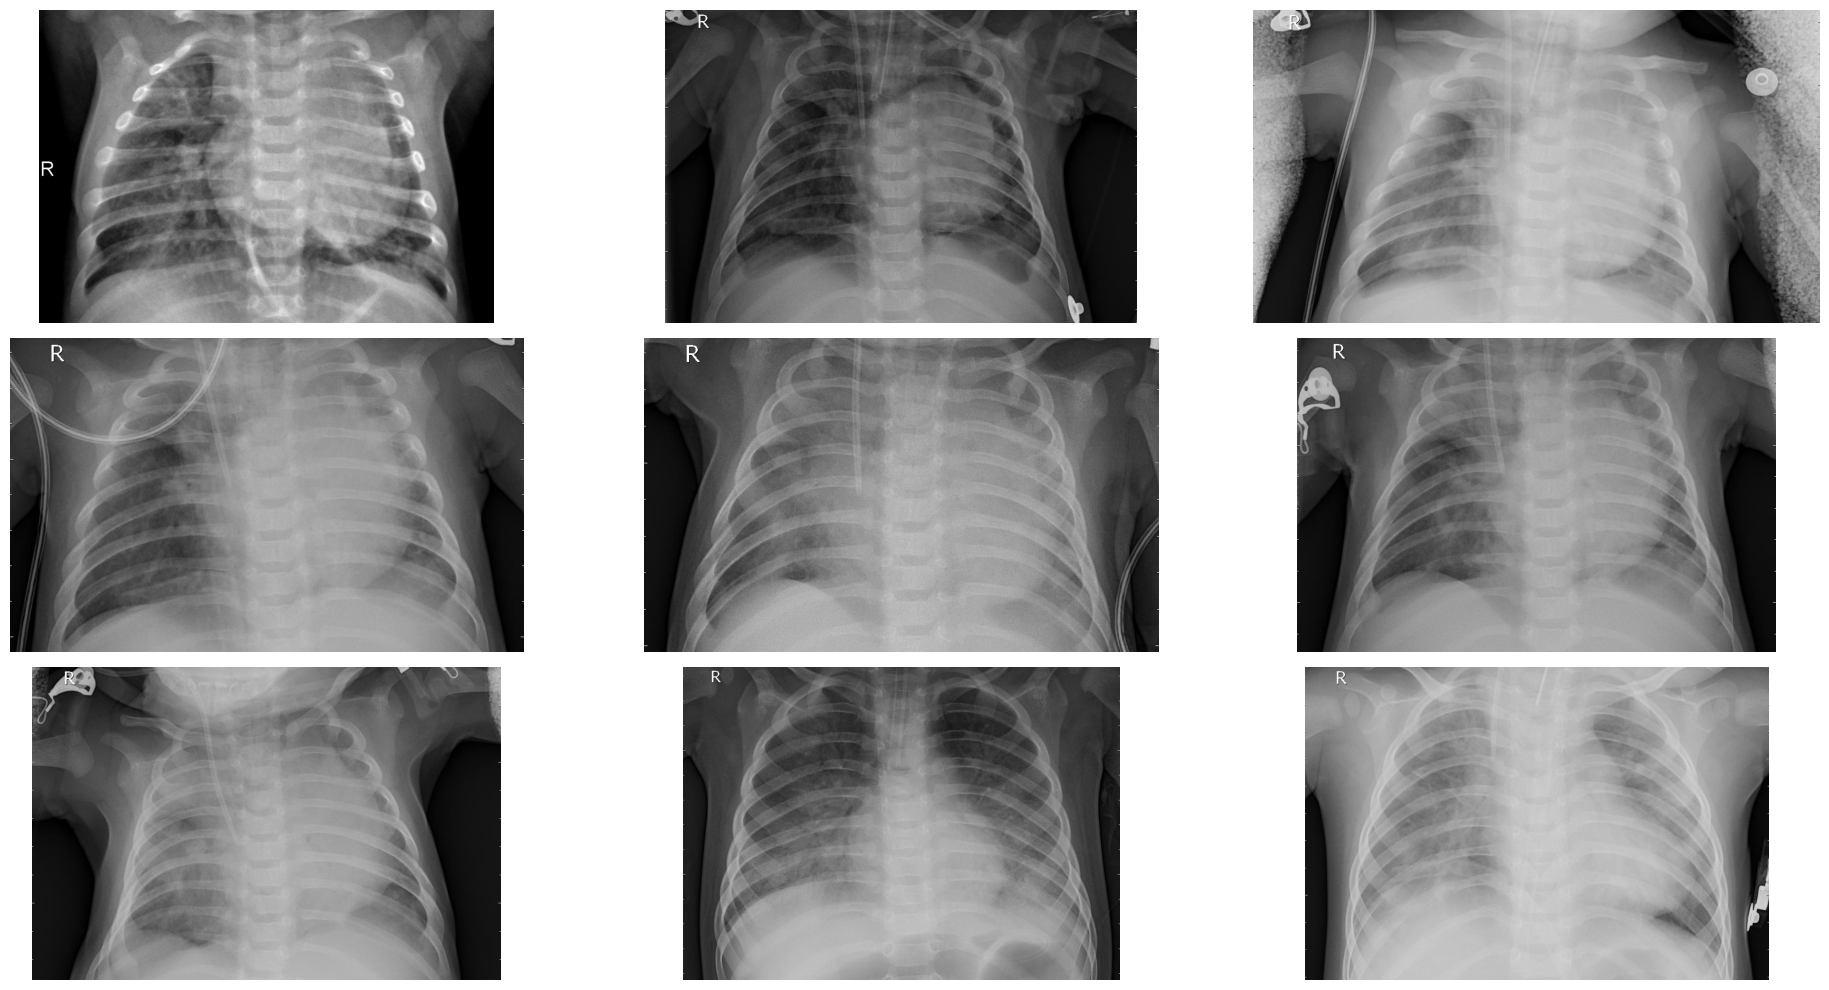

In [ ]:
#Direktori Test,Train dan Validation
train_dir = "D:/Telkom Institute of Technology/chest_xray/train"
test_dir = "D:/Telkom Institute of Technology/chest_xray/test"
val_dir = "D:/Telkom Institute of Technology/chest_xray/val"

#Memberikan informasi jumlah gambar pada direktori train
print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

#Memberikan informasi jumlah gambar pada direktori test
print("Test set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

#Memberikan informasi jumlah gambar pada direktori validation
print("Validation set:\n========================================")
print(f"PNEUMONIA = {len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL = {len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

#Proses memvisualisasikan contoh gambar
pneumonia = os.listdir("D:/Telkom Institute of Technology/chest_xray/train/PNEUMONIA")
pneumonia_dir = "D:/Telkom Institute of Technology/chest_xray/train/PNEUMONIA"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

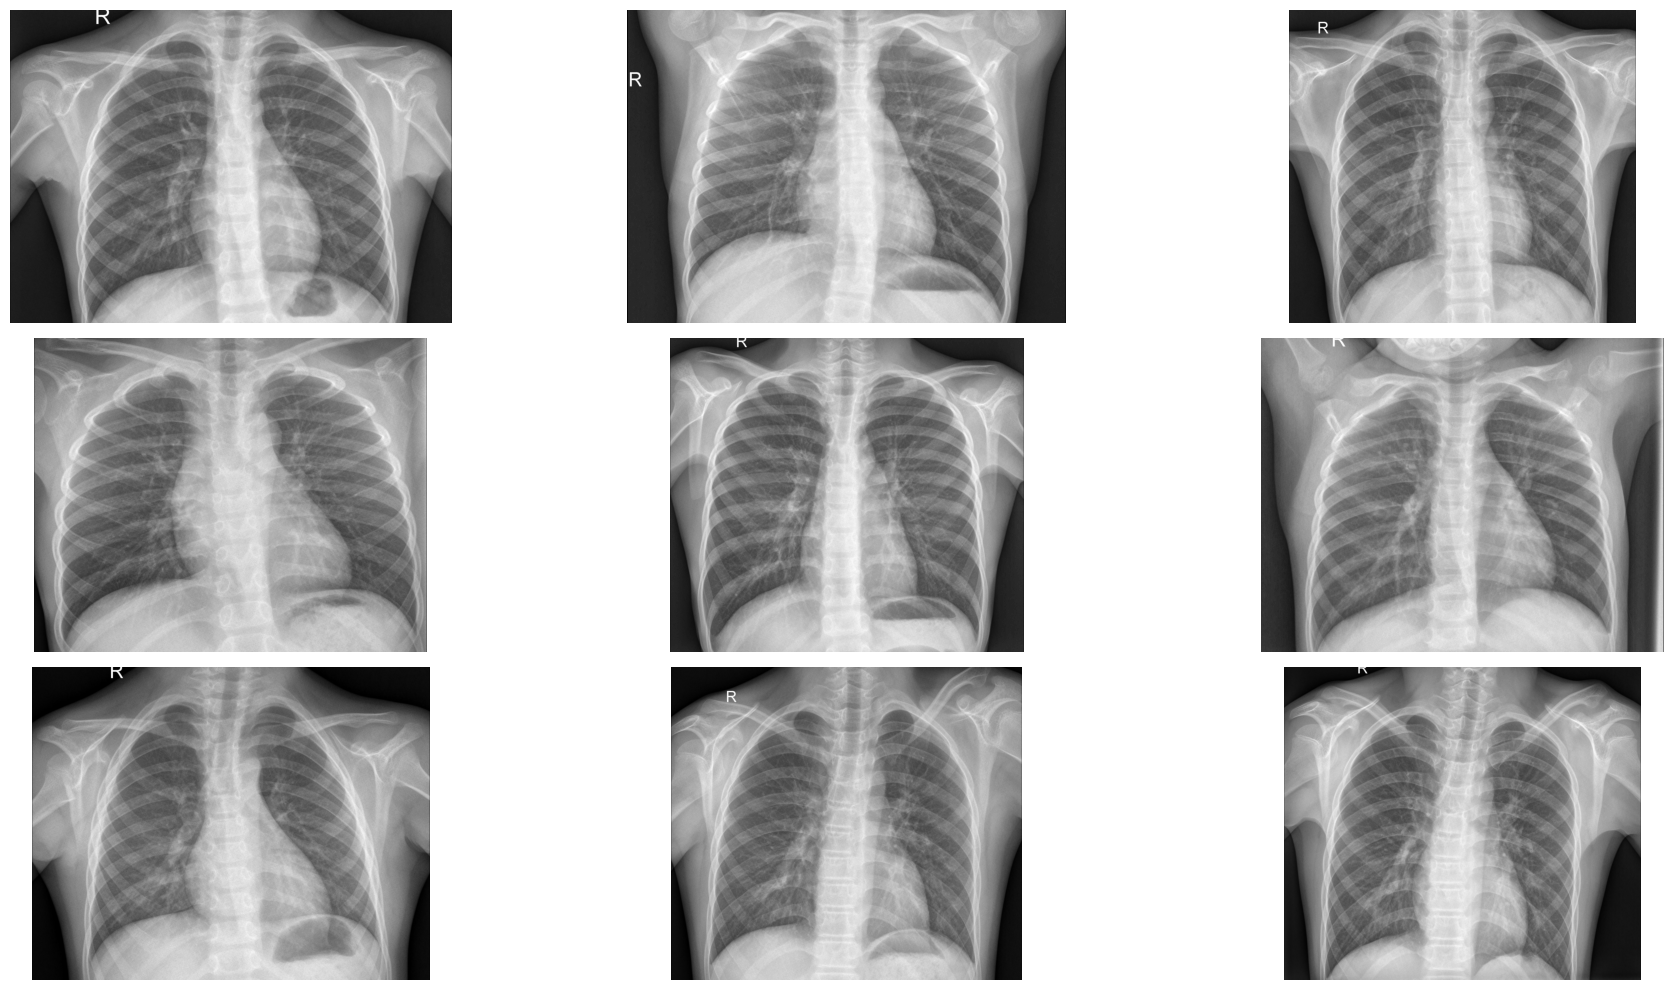

In [ ]:
#Direktori path test pada kelas normal
normal = os.listdir("D:/Telkom Institute of Technology/chest_xray/test/NORMAL")
normal_dir = "D:/Telkom Institute of Technology/chest_xray/test/NORMAL"

#Visalisasi gambar dari kelas normal
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

plt.tight_layout()

# 🔍 Investigate a single image

The dimensions of the image are 1317 pixels width and 1857 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 130.9986 and the standard deviation is 57.1020


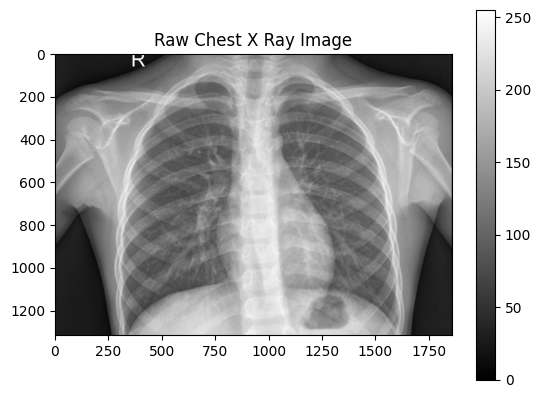

In [ ]:
#Direktori kelas normal pada path test
normal_img = os.listdir("D:/Telkom Institute of Technology/chest_xray/test/NORMAL")[0]
normal_dir = "D:/Telkom Institute of Technology/chest_xray/test/NORMAL"

#Proses menampilkan gambar
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

#investigasi informasi gambar pada kelas normal
print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

# 🔍 Investigate pixel value distribution

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22932\296820011.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_img.ravel(),


Text(0, 0.5, '# Pixels in Image')

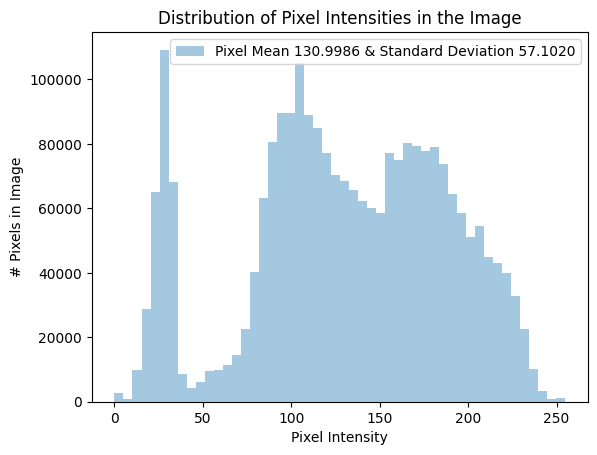

In [ ]:
#Proses menginvestigasi
sns.distplot(sample_img.ravel(),#meratakan matriks gambar menjadi satu dimensi
             label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}",
             kde=True)
plt.legend(loc='upper right')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Pixels in Image')

# 🔄 Image Preprocessing

In [ ]:
#Proses pengaturan konfigurasi gambar
image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir,
                                            batch_size=8,#Jumlah gambar setiap batch
                                            shuffle=True, #Pengacakan gambar pada setiap epoch
                                            class_mode='binary', #menghasilkan output model dalam bentuk binary
                                            target_size=(320, 320)) #ukuran gambar yang diharapkan dalam model

validation = image_generator.flow_from_directory(val_dir,
                                                batch_size=1, #Jumlah gambar setiap batch
                                                shuffle=False, #Pengacakan gambar pada setiap epoch
                                                class_mode='binary', #menghasilkan output model dalam bentuk binary
                                                target_size=(320, 320)) #ukuran gambar yang diharapkan dalam model

test = image_generator.flow_from_directory(test_dir,
                                            batch_size=1, #Jumlah gambar setiap batch
                                            shuffle=False, #Pengacakan gambar pada setiap epoch
                                            class_mode='binary', #menghasilkan output model dalam bentuk binary
                                            target_size=(320, 320)) #ukuran gambar yang diharapkan dalam model

Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height, one single color channel.
The maximum pixel value is 2.7217 and the minimum is -2.8424
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


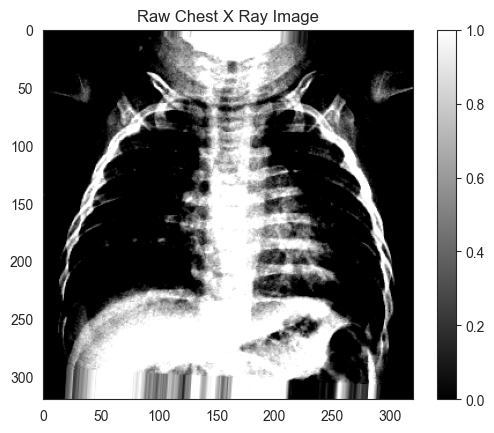

In [ ]:
#Proses Menampilkan dan memberikan informasi statistik tentang satu gambar
sns.set_style('white') #Latar belakang putih
generated_image, label = train.__getitem__(0) #mendapatkan batch pertama pada geerator bagian train

#Penampilan Gambar
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

#Memuat informasi gambar
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22412\4033312467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

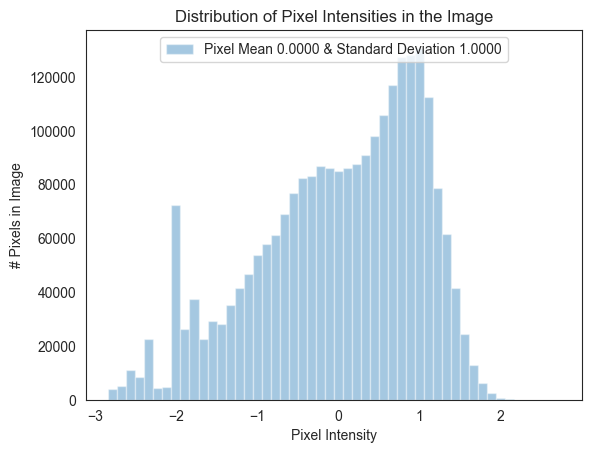

In [ ]:
#Proses untuk memuat informasi distribusi pixel dari gambar-gambar
sns.distplot(generated_image.ravel(),
             label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}",
             kde=False)

#Proses menampilkan gambar
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

# 🤖 Model Building




In [ ]:
#Membuat berat model
weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.50
Weight for class 1: 0.50


In [ ]:
#Proses pembuatan model CNN menggunakan Keras Sequential
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(320, 320, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#Memuat informasi model yang telah dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 318, 318, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 318, 318, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 316, 316, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 316, 316, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 158, 158, 32)     0         
 )                                                               
                                                        

In [ ]:
#Proses Pelatiahn Model CNN
r = model.fit(
    train,
    epochs=20,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/20
100/100 [==============================] - 292s 3s/step - loss: 3.4325 - accuracy: 0.7738 - val_loss: 0.1424 - val_accuracy: 0.9600
Epoch 2/20
100/100 [==============================] - 304s 3s/step - loss: 0.2933 - accuracy: 0.8087 - val_loss: 1.6620 - val_accuracy: 0.5200
Epoch 3/20
100/100 [==============================] - 327s 3s/step - loss: 0.2563 - accuracy: 0.8487 - val_loss: 0.5357 - val_accuracy: 0.9200
Epoch 4/20
100/100 [==============================] - 336s 3s/step - loss: 0.2048 - accuracy: 0.8662 - val_loss: 0.3183 - val_accuracy: 0.9600
Epoch 5/20
100/100 [==============================] - 288s 3s/step - loss: 0.2402 - accuracy: 0.8462 - val_loss: 0.4918 - val_accuracy: 0.7200
Epoch 6/20
100/100 [==============================] - 281s 3s/step - loss: 0.1742 - accuracy: 0.8850 - val_loss: 0.8981 - val_accuracy: 0.4800
Epoch 7/20
100/100 [==============================] - 281s 3s/step - loss: 0.1274 - accuracy: 0.9187 - val_loss: 0.4255 - val_accuracy: 0.8000

Text(0.5, 1.0, 'Accuracy Evolution')

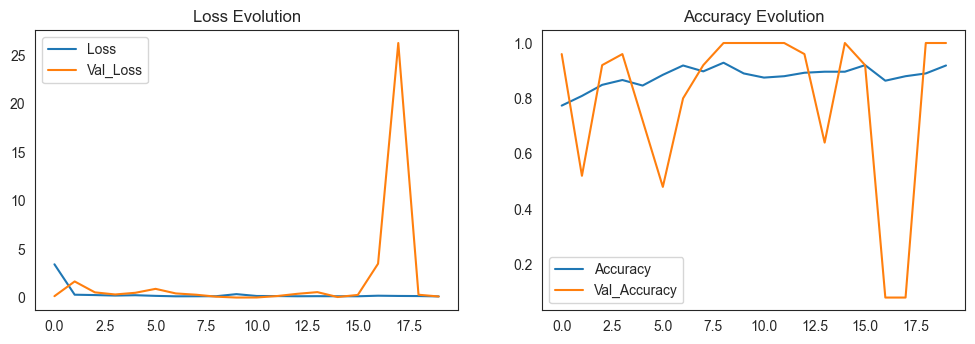

In [ ]:
#Menampilkan statistik data pada model yang telah dilatih
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
#Evaluasi akurasi pada model CNN yang telah dilatih
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3000/3000 [==============================] - 378s 126ms/step - loss: 0.2684 - accuracy: 0.8933
Test Accuracy: 89.33%
375/375 [==============================] - 347s 925ms/step - loss: 0.2874 - accuracy: 0.8917
Train Accuracy: 89.17%


In [ ]:
#Prediksi pada model test dan ditampilkan pada confusion matrix
pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

3000/3000 [==============================] - 341s 114ms/step
[[1476   24]
 [ 279 1221]]


,0,1,accuracy,macro avg,weighted avg
precision,0.841026,0.980723,0.899,0.910874,0.910874
recall,0.984000,0.814000,0.899,0.899000,0.899000
f1-score,0.906912,0.889617,0.899,0.898265,0.898265
support,1500.000000,1500.000000,0.899,3000.000000,3000.000000


In [ ]:
#Evaluasi model menggunakan nilai mabang batas 0.7
print(confusion_matrix(test.classes, pred > 0.7))
pd.DataFrame(classification_report(test.classes, pred > 0.7, output_dict=True))

[[1493    7]
 [ 393 1107]]


,0,1,accuracy,macro avg,weighted avg
precision,0.791622,0.993716,0.866667,0.892669,0.892669
recall,0.995333,0.738000,0.866667,0.866667,0.866667
f1-score,0.881867,0.846978,0.866667,0.864422,0.864422
support,1500.000000,1500.000000,0.866667,3000.000000,3000.000000


# DenseNet



In [ ]:
#Proses menggunakan arsitektur densenet sebagai base model
base_model = DenseNet121(input_shape=(320, 320, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 326, 326, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 160, 160, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                        

In [ ]:
#Penjelasan informasi tentang model arsitektur DenseNet121
layers = base_model.layers
print(f"The model has {len(layers)} layers")

print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The model has 428 layers
The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [ ]:
#Pembuatan Model DenseNet121
base_model = DenseNet121(input_shape=(320, 320, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Proses Pelatihan Model DenseNet121
r = model.fit(
    train,
    epochs=20,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=100,
    validation_steps=25,
)

Epoch 1/20
100/100 [==============================] - 696s 7s/step - loss: 0.1982 - accuracy: 0.8550 - val_loss: 1.0240e-11 - val_accuracy: 1.0000
Epoch 2/20
100/100 [==============================] - 791s 8s/step - loss: 0.1528 - accuracy: 0.8825 - val_loss: 0.3697 - val_accuracy: 0.9200
Epoch 3/20
100/100 [==============================] - 751s 8s/step - loss: 0.1344 - accuracy: 0.8875 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 4/20
100/100 [==============================] - 748s 7s/step - loss: 0.1445 - accuracy: 0.8737 - val_loss: 4.8597e-04 - val_accuracy: 1.0000
Epoch 5/20
100/100 [==============================] - 738s 7s/step - loss: 0.1204 - accuracy: 0.9062 - val_loss: 3.9764e-06 - val_accuracy: 1.0000
Epoch 6/20
100/100 [==============================] - 750s 7s/step - loss: 0.1123 - accuracy: 0.9225 - val_loss: 3.7546 - val_accuracy: 0.0800
Epoch 7/20
100/100 [==============================] - 742s 7s/step - loss: 0.1166 - accuracy: 0.9175 - val_loss: 1.3506e-04 - val_

Text(0.5, 1.0, 'Accuracy Evolution')

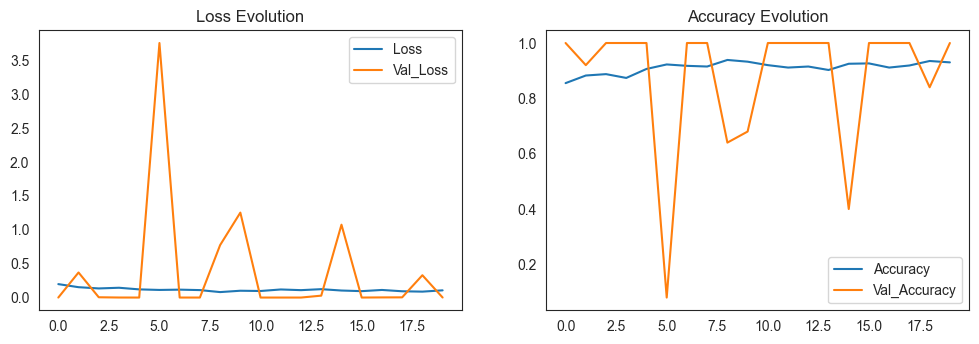

In [ ]:
#Menampilkan Hasil model yang telah di uji coba dalam bentuk plot
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
#Evaluasi akurasi pada model DenseNet121 yang telah dilatih
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

3000/3000 [==============================] - 883s 294ms/step - loss: 0.4941 - accuracy: 0.8493
Test Accuracy: 84.93%
375/375 [==============================] - 647s 2s/step - loss: 0.5004 - accuracy: 0.8493
Train Accuracy: 84.93%


# Evaluation

In [ ]:
#Memprediksi model yang telah dilatih untuk membuat prediksi pada dataset pengujian "test"
predicted_vals = model.predict(test, steps=len(test))

3000/3000 [==============================] - 956s 318ms/step


In [ ]:
#Menggunakan hasil prediksi model (predicted_vals) untuk membuat confusion matrix dan laporan klasifikasi
print(confusion_matrix(test.classes, predicted_vals > 0.5))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.5, output_dict=True))

[[1487   13]
 [ 461 1039]]


,0,1,accuracy,macro avg,weighted avg
precision,0.763347,0.987643,0.842,0.875495,0.875495
recall,0.991333,0.692667,0.842,0.842000,0.842000
f1-score,0.862529,0.814263,0.842,0.838396,0.838396
support,1500.000000,1500.000000,0.842,3000.000000,3000.000000


In [ ]:
#Menggunakan hasil prediksi model (predicted_vals) untuk membuat confusion matrix dan laporan klasifikasi dengan nilai ambang batas 0.7
print(confusion_matrix(test.classes, predicted_vals > 0.7))
pd.DataFrame(classification_report(test.classes, predicted_vals > 0.7, output_dict=True))

[[1493    7]
 [ 545  955]]


,0,1,accuracy,macro avg,weighted avg
precision,0.732581,0.992723,0.816,0.862652,0.862652
recall,0.995333,0.636667,0.816,0.816000,0.816000
f1-score,0.843980,0.775792,0.816,0.809886,0.809886
support,1500.000000,1500.000000,0.816,3000.000000,3000.000000
